In [ ]:
#imports
import pandas as pd
import numpy as np

from os import replace

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
#loading the data and making a copy
data = pd.read_csv('data_df.csv')
df = data.copy()

#previewing the data
df

,year_month,country,county,uid,uid_code,uidear,county_code,adolescent_10_24_receiving_fp_new,adolescent_10_24_receiving_fp_revisits,adults_25+_receiving_fp_services_new,...,iud_stock_dispensed,iud_stock_at_hand,iud_stock_requested,iud_stock_received,eligible_fp,"core_health_workforce_per_10,000population",Demand_Satisfied_by_Modern_Methods (%),"mCPR (Married Women, %)","Teenage Pregnancy Rate (15-19, %)","Total Unmet Need (Married Women, %)"
0,202412,Kenya,Kwale,N7YETT3A9r1,202412_N7YETT3A9r1,2024_N7YETT3A9r1,KE_County_2,821,2065,877,...,0,0,0,0,248890.26,NaN,NaN,NaN,NaN,NaN
1,202412,Kenya,Migori,fVra3Pwta0Q,202412_fVra3Pwta0Q,2024_fVra3Pwta0Q,KE_County_44,6551,5177,1602,...,0,0,0,0,372197.00,NaN,NaN,NaN,NaN,NaN
2,202412,Kenya,Muranga,ahwTMNAJvrL,202412_ahwTMNAJvrL,2024_ahwTMNAJvrL,KE_County_21,612,1179,997,...,0,0,0,0,308647.00,NaN,NaN,NaN,NaN,NaN
3,202412,Kenya,Kericho,ihZsJ8alvtb,202412_ihZsJ8alvtb,2024_ihZsJ8alvtb,KE_County_35,1007,1538,1675,...,0,0,0,0,306614.00,NaN,NaN,NaN,NaN,NaN
4,202412,Kenya,Embu,PFu8alU2KWG,202412_PFu8alU2KWG,2024_PFu8alU2KWG,KE_County_14,331,996,378,...,0,0,0,0,196151.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,201401,Kenya,Nakuru,ob6SxuRcqU4,201401_ob6SxuRcqU4,2014_ob6SxuRcqU4,KE_County_32,0,0,0,...,40,677,262,33,404645.00,NaN,NaN,NaN,NaN,NaN
6200,201401,Kenya,Isiolo,bzOfj0iwfDH,201401_bzOfj0iwfDH,2014_bzOfj0iwfDH,KE_County_11,0,0,0,...,0,0,0,0,36982.00,NaN,NaN,NaN,NaN,NaN
6201,201401,Kenya,Migori,fVra3Pwta0Q,201401_fVra3Pwta0Q,2014_fVra3Pwta0Q,KE_County_44,0,0,0,...,17,271,1500,30,204480.00,NaN,NaN,NaN,NaN,NaN
6202,201401,Kenya,Wajir,CeLsrJOH0g9,201401_CeLsrJOH0g9,2014_CeLsrJOH0g9,KE_County_8,0,0,0,...,0,0,0,0,112405.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
#previewing the columns
df.columns

Index(['year_month', 'country', 'county', 'uid', 'uid_code', 'uidear',
       'county_code', 'adolescent_10_24_receiving_fp_new',
       'adolescent_10_24_receiving_fp_revisits',
       'adults_25+_receiving_fp_services_new',
       'adults_25+_receiving_fp_services_revisits', 'condoms_new',
       'condoms_revisits', 'traditional_new', 'pills_new', 'pills_revisits',
       'traditional_revisits', 'injectable_new', 'injectable_revisits',
       'traditional', 'implants_new', 'implants_revisits', 'iucd_new',
       'iucd_revisits', 'surgical_new', 'surgical_revisits', 'condoms',
       'pills', 'injectables', 'implants', 'iucd', 'surgical',
       'total_modern_fp', 'total_cyp', 'periodid', 'periodname',
       'pills_combined_oral_contraceptive_stock_losses',
       'pills_combined_oral_contraceptive_stock_dispensed',
       'pills_combined_oral_contraceptive_stock_at_hand',
       'pills_combined_oral_contraceptive_stock_requested',
       'pills_combined_oral_contraceptive_stock_rece

### Feature engineering

In [ ]:
#Dropping columns with only NaN values
df = df.drop(columns=df.columns[df.isna().all()])

In [ ]:
#checking if the columns with only NaN values have been dropped
df.columns[df.isna().all()]

Index([], dtype='object')

In [ ]:
#Dropping irrelevant columns for modeling
df.drop(['country','uid_code','uidear'], axis=1, inplace=True)

In [ ]:
#Extracting county code from county code column to use code as category
df['county_code'] = df['county_code'].str.extract(r'KE_County_(\d+)').astype(int)

In [ ]:
# convert 'year_month' to a string in order to extract the year and month as individual columns
df['year_month'] = df['year_month'].astype(str)

df['year'] = df['year_month'].str[:4].astype(int)
df['month'] = df['year_month'].str[4:].astype(int)

In [ ]:
#Checking the percentage of missing values per column
(df.isna().sum() / len(df)) * 100

,0
year_month,0.000000
county,0.000000
uid,0.000000
county_code,0.000000
adolescent_10_24_receiving_fp_new,0.000000
...,...
"mCPR (Married Women, %)",99.242424
"Teenage Pregnancy Rate (15-19, %)",99.242424
"Total Unmet Need (Married Women, %)",99.242424
year,0.000000


In [ ]:
# filling the NaN values with 0
df.fillna(0, inplace=True)

In [ ]:
#creating 'fp_demand_ratio' as our target column
df['total_new_fp_users'] = (
    df['adolescent_10_24_receiving_fp_new'] +
    df['adults_25+_receiving_fp_services_new']
)

df['fp_demand_ratio'] = df['total_new_fp_users'] / df['eligible_fp']
df['revisit_to_new_ratio'] = (
    df['adolescent_10_24_receiving_fp_revisits'] /
    (df['adolescent_10_24_receiving_fp_new'] + 1)
)

In [ ]:
#previewing our data
df.head()

,year_month,county,uid,county_code,adolescent_10_24_receiving_fp_new,adolescent_10_24_receiving_fp_revisits,adults_25+_receiving_fp_services_new,adults_25+_receiving_fp_services_revisits,condoms_new,condoms_revisits,...,eligible_fp,Demand_Satisfied_by_Modern_Methods (%),"mCPR (Married Women, %)","Teenage Pregnancy Rate (15-19, %)","Total Unmet Need (Married Women, %)",year,month,total_new_fp_users,fp_demand_ratio,revisit_to_new_ratio
0,202412,Kwale,N7YETT3A9r1,2,821,2065,877,4726,127,99,...,248890.26,0.0,0.0,0.0,0.0,2024,12,1698,0.006822,2.512165
1,202412,Migori,fVra3Pwta0Q,44,6551,5177,1602,5577,731,488,...,372197.00,0.0,0.0,0.0,0.0,2024,12,8153,0.021905,0.790140
2,202412,Muranga,ahwTMNAJvrL,21,612,1179,997,4373,174,402,...,308647.00,0.0,0.0,0.0,0.0,2024,12,1609,0.005213,1.923328
3,202412,Kericho,ihZsJ8alvtb,35,1007,1538,1675,2138,226,80,...,306614.00,0.0,0.0,0.0,0.0,2024,12,2682,0.008747,1.525794
4,202412,Embu,PFu8alU2KWG,14,331,996,378,3938,96,68,...,196151.00,0.0,0.0,0.0,0.0,2024,12,709,0.003615,3.000000


# Modeling
## Baseline model- Linear Regression Model

In [ ]:
# Drop non-predictive columns
drop_cols = ['county', 'uid', 'fp_demand_ratio']

X = df.drop(columns=drop_cols)
y = df['fp_demand_ratio']

# Identify feature types
categorical_cols = ['county_code']
numeric_cols = X.select_dtypes(include='number').columns.difference(categorical_cols).tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])
# Linear Regression pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model
linear_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Baseline")
print("RMSE:", rmse)
print("R² Score:", r2)


Linear Regression Baseline
RMSE: 2.746180925874058e-06
R² Score: 0.8896816077899221


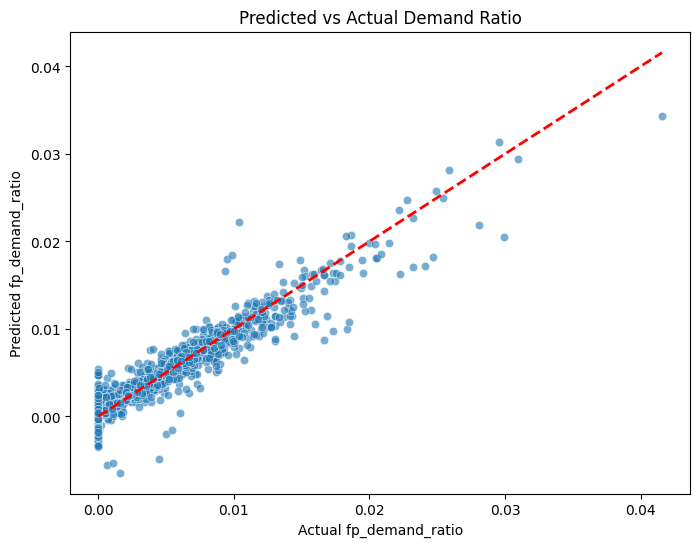

In [ ]:
#plotting the predicted vs actual demand ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual fp_demand_ratio")
plt.ylabel("Predicted fp_demand_ratio")
plt.title("Predicted vs Actual Demand Ratio");

## Random Forest

In [ ]:
#Random forest Model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("RMSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest:
RMSE: 2.5447332724833505e-07
R²: 0.9897774075779621


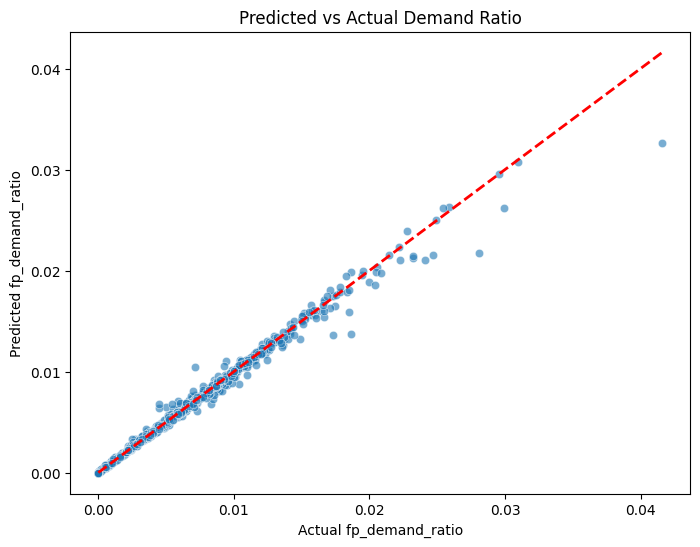

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual fp_demand_ratio")
plt.ylabel("Predicted fp_demand_ratio")
plt.title("Predicted vs Actual Demand Ratio");

## XGBoost

In [ ]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost:")
print("RMSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBoost:
RMSE: 2.0933037472854878e-07
R²: 0.991590870738629


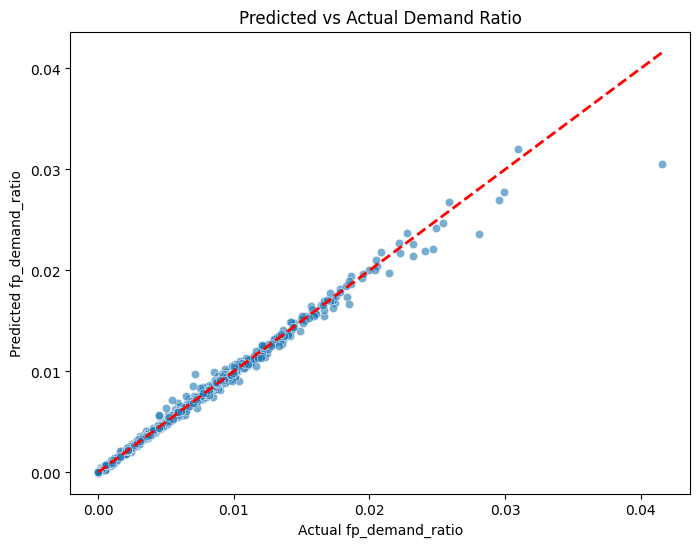

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual fp_demand_ratio")
plt.ylabel("Predicted fp_demand_ratio")
plt.title("Predicted vs Actual Demand Ratio");

In [ ]:
lgbm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM:")
print("RMSE:", mean_squared_error(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11622
[LightGBM] [Info] Number of data points in the train set: 4963, number of used features: 114
[LightGBM] [Info] Start training from score 0.005325
LightGBM:
RMSE: 1.7803445704486443e-07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "LightGBM"],
    "RMSE": [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_lgbm),
    ],
    "R2": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgbm),
    ]
}

pd.DataFrame(results)

,Model,RMSE,R2
0,Linear Regression,2.746181e-06,0.889682
1,Random Forest,2.544733e-07,0.989777
2,XGBoost,2.093304e-07,0.991591
3,LightGBM,1.780345e-07,0.992848


Trying GridSerchCV on the XGboost and LGBMRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid_xgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 6, 10],
    'regressor__subsample': [0.8, 1],
    'regressor__colsample_bytree': [0.8, 1]
}

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

grid_search_xgb = GridSearchCV(
    xgb_pipeline, param_grid=param_grid_xgb,
    scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose=1
)

grid_search_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_search_xgb.best_params_)
print("Best RMSE:", -grid_search_xgb.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGB Params: {'regressor__colsample_bytree': 1, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 6, 'regressor__n_estimators': 100, 'regressor__subsample': 1}
Best RMSE: 0.0004838534412911669


In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

param_grid_lgb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__num_leaves': [31, 50, 100],
    'regressor__max_depth': [-1, 5, 10]
}

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42))
])

grid_search_lgb = GridSearchCV(
    lgbm_pipeline, param_grid=param_grid_lgb,
    scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose=1
)

grid_search_lgb.fit(X_train, y_train)

print("Best LGBM Params:", grid_search_lgb.best_params_)
print("Best RMSE:", -grid_search_lgb.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11622
[LightGBM] [Info] Number of data points in the train set: 4963, number of used features: 114
[LightGBM] [Info] Start training from score 0.005325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light